In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
from astropy.io import ascii

In [7]:
file='PS11aopx_ParameterSpace.csv'
data = ascii.read(file,format='csv')
#file_out = 'PS11aoptest.csv' #File that you will save the results in.
Fp_g = [] #peak flux
nup_g =[] #peak frequency
R_g =[] #radius
B_g = [] #Bfield
vsh_g = [] #velocity of shock
M_g = [] #mass loss rate
den_g = []
RuledOut_g = [] #flag for whether it is ruled out
RuledOut2_g = []

rule = data['RuledOut']
v = data['v_shock']
R = data['Radius']
#for np.where((data['RuledOut'] == "False") & (data['v_shock'] > 3505.583) & (data['Radius'] < 5.11e16)  ):
for i in range(len(rule)):
    
    if rule == False:
            if v > 3505.583: #and R < 5.11e16:
                RuledOut2 = False 
            else: 
                RuledOut2 = True
                
            Fp_g.append(F_peak) 
            nup_g.append(nu_peak) 
            R_g.append(Radius) 
            B_g.append(Bfield) 
            vsh_g.append(v_shock) 
            M_g.append(Mdot)
            den_g.append(den)
            RuledOut_g.append(RuledOut)
            RuledOut2_g.append(RuledOut2)

        
data = [Fp_g,nup_g,R_g,B_g,vsh_g,M_g,den_g,RuledOut_g,RuledOut2_g]
names = ['F_peak','nu_peak','Radius','Bfield','v_shock','Mdot','den','RuledOut','RuledOut2']
ascii.write(data,file_out,names=names,overwrite=True,format='csv')

/home/ibik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


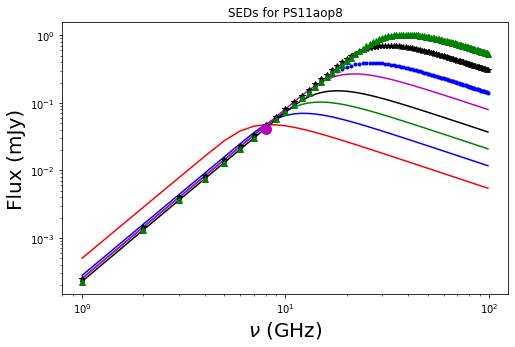

In [46]:
data = pd.read_csv('/home/ibik/ps11aop2epoch.csv')
F_nup1 = data['F_peak'][1] #.take([0, 3, 14])#data['F_peak'][3,5,6])
nu_p1 = data['nu_peak'][1]#.take([0, 3, 14])#[3,5,6])
R1 = data['Radius'][1]#.take([0, 3, 14]) #[3,5,6])
M1 = data['Mdot'][1]#.take([0, 3, 14])

t=t_p = 1261.509031 # time of observation in days
D = 1088.1 # distance to SN in Mpc
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2
nu =np.arange(1, 100, dtype=float)
        #calculate SSA
SSA_sed1 = F_nup1*1.582*(t/t_p)**a*(nu/nu_p1)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p1)**(-(p+4)/2)))           
#Correct SED for FFA:
Z_ave = 5.4  # Average metallicity 1= pure H. 5.4 for a massive star
miu = 1.9 # mean molecular weight of electrons. 1= pure H  1.9 is for a massive star.
vw_cgs = 100 * 1e5 # assumed wind velocity in cgs (cm/s). Take this as 1000 * 10^5 for now. (i.e. 1000 km/s in cgs)
T = 10**4 # temperature of the material absorbing in K.  10^4 is a good starting point. 

M_cgs1 =  M1 * 1e-5 * 6.307e+25 #mass loss rate in cgs units
tau_ff1 = 2.021e25*M_cgs1**2*Z_ave/(miu**2*nu**(2.1)*R1**3*vw_cgs**2*T**(1.35))   
SSA_FFA_sed1 = SSA_sed1*np.exp(-tau_ff1)

F_nup2 = data['F_peak'][2] #.take([0, 3, 14])#data['F_peak'][3,5,6])
nu_p2 = data['nu_peak'][2]#.take([0, 3, 14])#[3,5,6])
R2 = data['Radius'][2]#.take([0, 3, 14]) #[3,5,6])
M2 = data['Mdot'][2]#.take([0, 3, 14])
SSA_sed2 = F_nup2*1.582*(t/t_p)**a*(nu/nu_p2)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p2)**(-(p+4)/2)))    
M_cgs2 =  M2 * 1e-5 * 6.307e+25 #mass loss rate in cgs units
tau_ff2 = 2.021e25*M_cgs2**2*Z_ave/(miu**2*nu**(2.1)*R2**3*vw_cgs**2*T**(1.35))   
SSA_FFA_sed2 = SSA_sed2*np.exp(-tau_ff2)

F_nup3 = data['F_peak'][3] #.take([0, 3, 14])#data['F_peak'][3,5,6])
nu_p3 = data['nu_peak'][3]#.take([0, 3, 14])#[3,5,6])
R3 = data['Radius'][3]#.take([0, 3, 14]) #[3,5,6])
M3 = data['Mdot'][3]#.take([0, 3, 14])
SSA_sed3 = F_nup3*1.582*(t/t_p)**a*(nu/nu_p3)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p3)**(-(p+4)/2)))    
M_cgs3 =  M3 * 1e-5 * 6.307e+25 #mass loss rate in cgs units
tau_ff3 = 2.021e25*M_cgs3**2*Z_ave/(miu**2*nu**(2.1)*R3**3*vw_cgs**2*T**(1.35))   
SSA_FFA_sed3 = SSA_sed3*np.exp(-tau_ff3)

F_nup4 = data['F_peak'][4] #.take([0, 3, 14])#data['F_peak'][3,5,6])
nu_p4 = data['nu_peak'][4]#.take([0, 3, 14])#[3,5,6])
R4 = data['Radius'][4]#.take([0, 3, 14]) #[3,5,6])
M4 = data['Mdot'][4]#.take([0, 3, 14])
SSA_sed4 = F_nup4*1.582*(t/t_p)**a*(nu/nu_p4)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p4)**(-(p+4)/2)))    
M_cgs4 =  M4 * 1e-5 * 6.307e+25 #mass loss rate in cgs units
tau_ff4 = 2.021e25*M_cgs4**2*Z_ave/(miu**2*nu**(2.1)*R4**3*vw_cgs**2*T**(1.35))   
SSA_FFA_sed4 = SSA_sed4*np.exp(-tau_ff4)

F_nup5 = data['F_peak'][5] #.take([0, 3, 14])#data['F_peak'][3,5,6])
nu_p5 = data['nu_peak'][5]#.take([0, 3, 14])#[3,5,6])
R5 = data['Radius'][5]#.take([0, 3, 14]) #[3,5,6])
M5 = data['Mdot'][5]#.take([0, 3, 14])
SSA_sed5 = F_nup5*1.582*(t/t_p)**a*(nu/nu_p5)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p5)**(-(p+4)/2)))    
M_cgs5 =  M5 * 1e-5 * 6.307e+25 #mass loss rate in cgs units
tau_ff5 = 2.021e25*M_cgs5**2*Z_ave/(miu**2*nu**(2.1)*R5**3*vw_cgs**2*T**(1.35))   
SSA_FFA_sed5 = SSA_sed5*np.exp(-tau_ff5)

F_nup6 = data['F_peak'][6] #.take([0, 3, 14])#data['F_peak'][3,5,6])
nu_p6 = data['nu_peak'][6]#.take([0, 3, 14])#[3,5,6])
R6 = data['Radius'][6]#.take([0, 3, 14]) #[3,5,6])
M6 = data['Mdot'][6]#.take([0, 3, 14])
SSA_sed6 = F_nup6*1.582*(t/t_p)**a*(nu/nu_p6)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p6)**(-(p+4)/2)))    
M_cgs6 =  M2 * 1e-5 * 6.307e+25 #mass loss rate in cgs units
tau_ff6 = 2.021e25*M_cgs6**2*Z_ave/(miu**2*nu**(2.1)*R6**3*vw_cgs**2*T**(1.35))   
SSA_FFA_sed6 = SSA_sed6*np.exp(-tau_ff6)

F_nup7 = data['F_peak'][7] #.take([0, 3, 14])#data['F_peak'][3,5,6])
nu_p7 = data['nu_peak'][7]#.take([0, 3, 14])#[3,5,6])
R7 = data['Radius'][7]#.take([0, 3, 14]) #[3,5,6])
M7 = data['Mdot'][7]#.take([0, 3, 14])
SSA_sed7 = F_nup7*1.582*(t/t_p)**a*(nu/nu_p7)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p7)**(-(p+4)/2)))    
M_cgs7 =  M7 * 1e-5 * 6.307e+25 #mass loss rate in cgs units
tau_ff7 = 2.021e25*M_cgs7**2*Z_ave/(miu**2*nu**(2.1)*R7**3*vw_cgs**2*T**(1.35))   
SSA_FFA_sed7 = SSA_sed7*np.exp(-tau_ff7)

F_nup8 = data['F_peak'][8] #.take([0, 3, 14])#data['F_peak'][3,5,6])
nu_p8 = data['nu_peak'][8]#.take([0, 3, 14])#[3,5,6])
R8 = data['Radius'][8]#.take([0, 3, 14]) #[3,5,6])
M8 = data['Mdot'][8]#.take([0, 3, 14])
SSA_sed8 = F_nup8*1.582*(t/t_p)**a*(nu/nu_p8)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p8)**(-(p+4)/2)))    
M_cgs8 =  M8 * 1e-5 * 6.307e+25 #mass loss rate in cgs units
tau_ff8 = 2.021e25*M_cgs8**2*Z_ave/(miu**2*nu**(2.1)*R8**3*vw_cgs**2*T**(1.35))   
SSA_FFA_sed8 = SSA_sed8*np.exp(-tau_ff8)

# F_nup9 = data['F_peak'][9] #.take([0, 3, 14])#data['F_peak'][3,5,6])
# nu_p9 = data['nu_peak'][9]#.take([0, 3, 14])#[3,5,6])
# R9 = data['Radius'][9]#.take([0, 3, 14]) #[3,5,6])
# M9 = data['Mdot'][9]#.take([0, 3, 14])
# SSA_sed9 = F_nup9*1.582*(t/t_p)**a*(nu/nu_p9)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p9)**(-(p+4)/2)))    
# M_cgs9 =  M9 * 1e-5 * 6.307e+25 #mass loss rate in cgs units
# tau_ff9 = 2.021e25*M_cgs9**2*Z_ave/(miu**2*nu**(2.1)*R9**3*vw_cgs**2*T**(1.35))   
# SSA_FFA_sed9 = SSA_sed9*np.exp(-tau_ff9)


# F_nup10 = data['F_peak'][212] #.take([0, 3, 14])#data['F_peak'][3,5,6])
# nu_p10 = data['nu_peak'][212]#.take([0, 3, 14])#[3,5,6])
# R10 = data['Radius'][212]#.take([0, 3, 14]) #[3,5,6])
# M10 = data['Mdot'][212]#.take([0, 3, 14])
# SSA_sed10 = F_nup10*1.582*(t/t_p)**a*(nu/nu_p10)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p10)**(-(p+4)/2)))    
# M_cgs10 =  M10 * 1e-5 * 6.307e+25 #mass loss rate in cgs units
# tau_ff10 = 2.021e25*M_cgs10**2*Z_ave/(miu**2*nu**(2.1)*R10**3*vw_cgs**2*T**(1.35))   
# SSA_FFA_sed10 = SSA_sed10*np.exp(-tau_ff10)


plt.figure(figsize=(8,5))
plt.rcParams.update({'font.size': 10})
plt.autoscale()
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)

plt.plot(nu,SSA_FFA_sed1,'r', nu,SSA_FFA_sed2,'b',nu,SSA_FFA_sed3,'g',nu,SSA_FFA_sed4,'k',nu,SSA_FFA_sed5,'m',nu,SSA_FFA_sed6,'b.',nu,SSA_FFA_sed7,'k*',nu,SSA_FFA_sed8,'g^',label ='PS11aop8')
plt.plot(8,0.0404, 'mo', markersize=10)
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)

        #plt.show()
plt.title('SEDs for PS11aop8') 
plt.savefig('PS11aop8.pdf')


In [44]:
data['F_peak'][0]

0.046415888336127996